# `scGenPerturbationAnalysis` Class Overview

The `scGenPerturbationAnalysis` class provides a streamlined pipeline for performing perturbation analysis using scGen on single-cell RNA-seq data. It encapsulates all necessary steps—from data exploration and preprocessing to model training, prediction, and evaluation—allowing for an organized and efficient analysis workflow.

By using this class, you can:
- Explore and visualize your dataset
- Preprocess data (filtering, normalization, selecting highly variable genes)
- Train an scGen model to predict cellular responses to perturbations
- Make predictions for specific cell types under stimulated conditions
- Evaluate model predictions against real data
- Identify differentially expressed genes
- Compute distance metrics to assess prediction accuracy

Methods:
- `explore_data`: Explore the dataset, print counts, and plot UMAPs.
- `filter_data`: Filter data based on specified conditions.
- `normalize_and_visualize`: Normalize data and visualize using UMAP.
- `preprocess_data`: Preprocess data (select highly variable genes, remove conditions, subsample).
- `prepare_training_set`: Exclude specific cells to prepare the training dataset.
- `setup_anndata`: Set up the AnnData object for scGen.
- `train_model`: Train the scGen model.
- `visualize_latent_space`: Visualize the latent space learned by the model.
- `make_prediction`: Predict the stimulated state for specific cell types.
- `evaluate_prediction`: Evaluate predictions against real data.
- `identify_diff_genes`: Find differentially expressed genes.
- `plot_mean_correlation`: Plot gene expression correlation between predictions and ground truth.
- `compute_distance_metric`: Compute a metric to assess prediction accuracy.

# Stephenson et al. 2021 (COVID-19 Dataset)

In [1]:
# Importing necessary libraries
import pertpy as pt
import scanpy as sc
import numpy as np
import sys
sys.path.append('./')
from scGen_class import scGenPerturbationAnalysis

In [ ]:
# Loading the dataset
covid_data = pt.dt.stephenson_2021_subsampled()
# covid_data = sc.read('data/stephenson_2021_subsampled.h5ad')

In [3]:
# Viewing the disease status of the cells
covid_data.obs['disease']

10_1038_s41591_021_01329_2-S11_GAGTCCGGTTCAGGCC-1          COVID-19
10_1038_s41591_021_01329_2-S12_ACTGTCCTCTCGTATT-1          COVID-19
10_1038_s41591_021_01329_2-S12_CTCTAATAGTTTCCTT-1          COVID-19
10_1038_s41591_021_01329_2-S12_GCATACAGTAATCGTC-1          COVID-19
10_1038_s41591_021_01329_2-S12_GACTGCGTCCTTTCGG-1          COVID-19
                                                             ...   
10_1038_s41591_021_01329_2-AGCAGCCGTCACTTCC-newcastle74      normal
10_1038_s41591_021_01329_2-TACTTACTCAAGGCTT-newcastle74      normal
10_1038_s41591_021_01329_2-CATCAAGGTAACGACG-newcastle74      normal
10_1038_s41591_021_01329_2-CACAGGCCAAGCCATT-newcastle74      normal
10_1038_s41591_021_01329_2-CATCCACGTTCGTGAT-newcastle74      normal
Name: disease, Length: 62509, dtype: category
Categories (2, object): ['COVID-19', 'normal']

In [4]:
# Instantiating the PerturbationAnalysis class with the loaded data
analysis = scGenPerturbationAnalysis(covid_data)

Exploring data...
Counts by ['disease', 'time_after_LPS']:
    disease time_after_LPS  counts
0  COVID-19            10h       0
1  COVID-19            90m       0
2  COVID-19            nan   48083
3    normal            10h    1335
4    normal            90m    1301
5    normal            nan   11790

No columns provided for value counts.



/home/giatraskon/BioHackEU24/BioHackathon/tools/Complex_generative/scGen/scGen_class.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_counts = self.data.obs.groupby(groupby_cols).size()


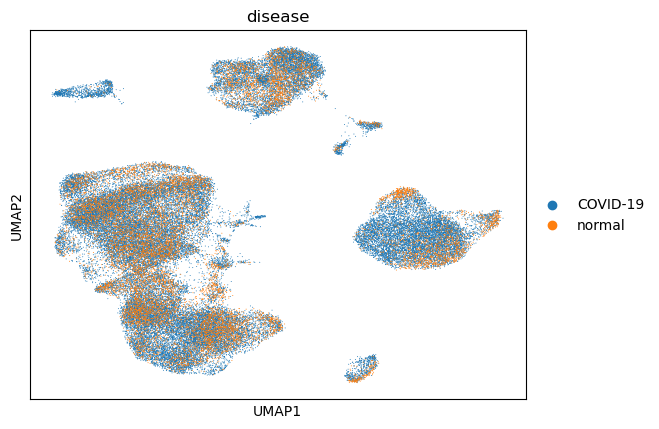

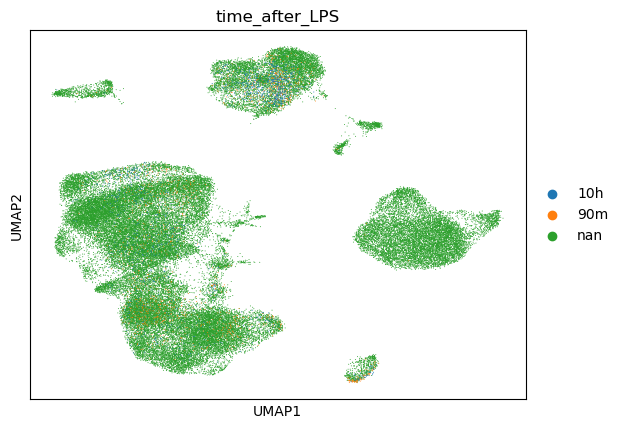

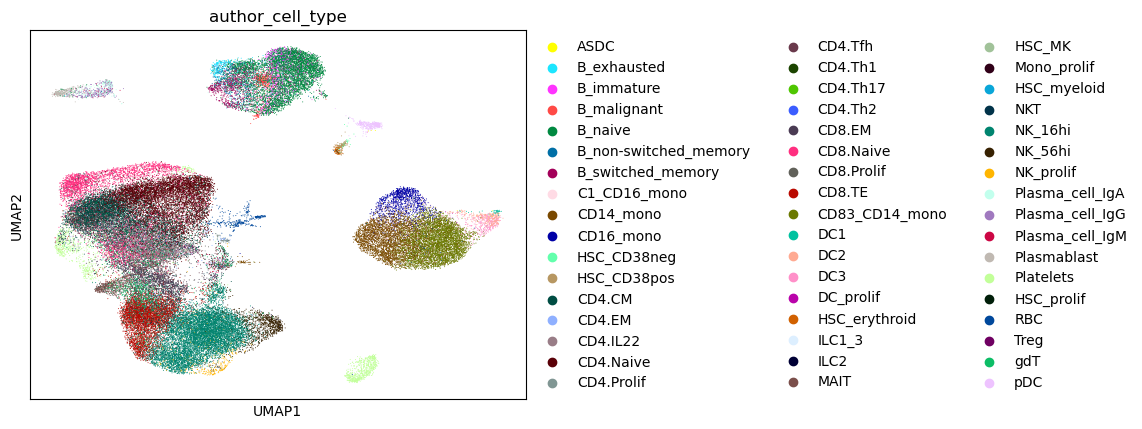


Exploring data...
Counts by ['disease', 'Status', 'time_after_LPS']:
     disease   Status time_after_LPS  counts
0   COVID-19    Covid            10h       0
1   COVID-19    Covid            90m       0
2   COVID-19    Covid            nan   48083
3   COVID-19  Healthy            10h       0
4   COVID-19  Healthy            90m       0
5   COVID-19  Healthy            nan       0
6   COVID-19      LPS            10h       0
7   COVID-19      LPS            90m       0
8   COVID-19      LPS            nan       0
9     normal    Covid            10h       0
10    normal    Covid            90m       0
11    normal    Covid            nan       0
12    normal  Healthy            10h       0
13    normal  Healthy            90m       0
14    normal  Healthy            nan   11790
15    normal      LPS            10h    1335
16    normal      LPS            90m    1301
17    normal      LPS            nan       0

No columns provided for value counts.

No columns provided for UMAP plotti

/home/giatraskon/BioHackEU24/BioHackathon/tools/Complex_generative/scGen/scGen_class.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_counts = self.data.obs.groupby(groupby_cols).size()


In [5]:
# Exploring the data

# First grouping: ['disease', 'time_after_LPS']
analysis.explore_data(
    groupby_cols=['disease', 'time_after_LPS'],
    plot_cols=['disease', 'time_after_LPS', 'author_cell_type']
)

# Second grouping: ['disease', 'Status', 'time_after_LPS']
analysis.explore_data(
    groupby_cols=['disease', 'Status', 'time_after_LPS']
)

In [6]:
# Filtering the data to include only healthy controls
analysis.filter_data(
    filter_conditions={'disease': ['normal']},
    verify_counts=True,
    count_groupby_cols=['disease', 'time_after_LPS']
)

Filtering data based on user-defined conditions...
Filtered data with conditions: {'disease': ['normal']}

Counts after filtering:
  disease time_after_LPS  counts
0  normal            10h    1335
1  normal            90m    1301
2  normal            nan   11790



/home/giatraskon/BioHackEU24/BioHackathon/tools/Complex_generative/scGen/scGen_class.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(self.data.obs.groupby(count_groupby_cols).size().reset_index(name='counts'))


Normalizing data...
Data normalized to total counts per cell with target sum 10000.0.

Log transformation skipped.



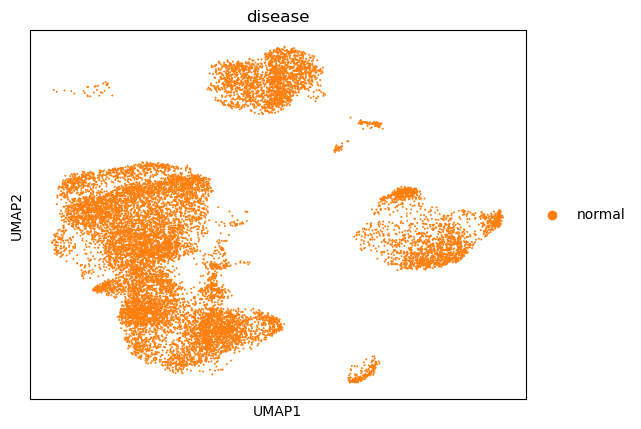


Exploring data...
Counts by ['time_after_LPS', 'cell_type']:
    time_after_LPS                         cell_type  counts
0              10h                            B cell      30
1              10h   CD4-positive, alpha-beta T cell       1
2              10h   CD8-positive, alpha-beta T cell       0
3              10h  CD14-low, CD16-positive monocyte       0
4              10h            CD14-positive monocyte       0
..             ...                               ...     ...
118            nan                       plasmablast       8
119            nan       plasmacytoid dendritic cell      65
120            nan                          platelet     257
121            nan                 regulatory T cell       8
122            nan          unswitched memory B cell      49

[123 rows x 3 columns]

No columns provided for value counts.

No columns provided for UMAP plotting.



/home/giatraskon/BioHackEU24/BioHackathon/tools/Complex_generative/scGen/scGen_class.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_counts = self.data.obs.groupby(groupby_cols).size()


In [7]:
# Normalizing and visualizing the LPS stimulated data
analysis.normalize_and_visualize(
    normalize=True,
    log_transform=False,
    target_sum=1e4,
    plot_cols=['disease']
)

# Displaying counts by 'time_after_LPS' and 'cell_type'
analysis.explore_data(
    groupby_cols=['time_after_LPS', 'cell_type']
)

In [8]:
# Exploring the data by 'cell_type' after filtering
analysis.explore_data(
    value_count_cols=['cell_type']
)

Exploring data...
No groupby columns provided for counts.

Value counts for 'cell_type':
cell_type
CD16-positive, CD56-dim natural killer cell, human       2117
naive thymus-derived CD4-positive, alpha-beta T cell     1838
naive B cell                                             1326
CD14-positive monocyte                                   1183
central memory CD4-positive, alpha-beta T cell           1182
naive thymus-derived CD8-positive, alpha-beta T cell     1092
effector CD8-positive, alpha-beta T cell                  813
T-helper 22 cell                                          723
effector memory CD8-positive, alpha-beta T cell           704
gamma-delta T cell                                        483
mature NK T cell                                          457
mucosal invariant T cell                                  391
platelet                                                  373
CD16-negative, CD56-bright natural killer cell, human     359
class switched memory B cell     

In [9]:
# Preprocessing the data (highly variable genes, top genes, removing conditions, subsampling)
analysis.preprocess_data(
    highly_variable_genes=False, # TRUE DOES NOT WORK, NEED TO FIX
    n_top_genes=2000,
    remove_conditions={'time_after_LPS': ['90m']},
    subsample_n=3000
)

Preprocessing data for scGen...
Selection of highly variable genes skipped.

Removed cells where 'time_after_LPS' is in ['90m'].

Subsampled data to 3000 observations.

Preprocessing completed.



In [10]:
# Exploring the data after preprocessing
analysis.explore_data(
    value_count_cols=['time_after_LPS']
)

analysis.explore_data(
    value_count_cols=['author_cell_type']
)

Exploring data...
No groupby columns provided for counts.

Value counts for 'time_after_LPS':
time_after_LPS
nan    2673
10h     327
Name: count, dtype: int64

No columns provided for UMAP plotting.

Exploring data...
No groupby columns provided for counts.

Value counts for 'author_cell_type':
author_cell_type
NK_16hi                  421
CD4.Naive                365
CD4.CM                   265
CD8.Naive                237
B_naive                  231
CD83_CD14_mono           184
CD8.EM                   164
CD4.IL22                 163
CD8.TE                   137
CD14_mono                100
MAIT                      99
gdT                       94
CD16_mono                 87
NK_56hi                   85
Platelets                 52
B_switched_memory         51
B_immature                36
DC3                       30
pDC                       23
B_non-switched_memory     23
DC2                       21
CD4.Tfh                   21
RBC                       20
B_exhausted         

In [11]:
# Preparing the training set by excluding naive B cells at 10h
analysis.prepare_training_set(exclude_query='(cell_type == "B_naive") & (time_after_LPS == "10h")')

Preparing training set by excluding specific conditions...
Excluded cells where: (cell_type == "B_naive") & (time_after_LPS == "10h")



In [12]:
# Exploring the data after preparing the training set
analysis.explore_data(
    value_count_cols=['author_cell_type']
)

Exploring data...
No groupby columns provided for counts.

Value counts for 'author_cell_type':
author_cell_type
NK_16hi                  421
CD4.Naive                365
CD4.CM                   265
CD8.Naive                237
B_naive                  231
CD83_CD14_mono           184
CD8.EM                   164
CD4.IL22                 163
CD8.TE                   137
CD14_mono                100
MAIT                      99
gdT                       94
CD16_mono                 87
NK_56hi                   85
Platelets                 52
B_switched_memory         51
B_immature                36
DC3                       30
pDC                       23
B_non-switched_memory     23
DC2                       21
CD4.Tfh                   21
RBC                       20
B_exhausted               19
NKT                       15
ILC1_3                     9
Plasma_cell_IgG            6
Plasma_cell_IgM            6
DC1                        6
Plasmablast                5
Plasma_cell_IgA  

In [13]:
# Setting up AnnData for scGen
analysis.setup_anndata(
    batch_key='time_after_LPS',
    labels_key='author_cell_type'
)

Setting up AnnData for scGen...
AnnData set up for scGen with batch_key='time_after_LPS' and labels_key='author_cell_type'.



/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(


In [14]:
# Training the scGen model with custom parameters if desired
analysis.train_model(
    max_epochs=20,
    batch_size=32,
    early_stopping=True,
    accelerator='cpu',
    devices='auto'
)

Initializing and training scGen model...


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


scGen model initialized.

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training:   0%|          | 0/20 [00:00<?, ?it/s]

/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:368: You have overridden `transfer_batch_to_device` in `LightningModule` but have passed in a `LightningDataModule`. It will use the implementation from `LightningModule` instance.
`Trainer.fit` stopped: `max_epochs=20` reached.


scGen model trained.

scGen model saved to 'model_perturbation_prediction.pt'.



Visualizing latent space...
Latent representations obtained.



/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 100 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


UMAP embedding computed.



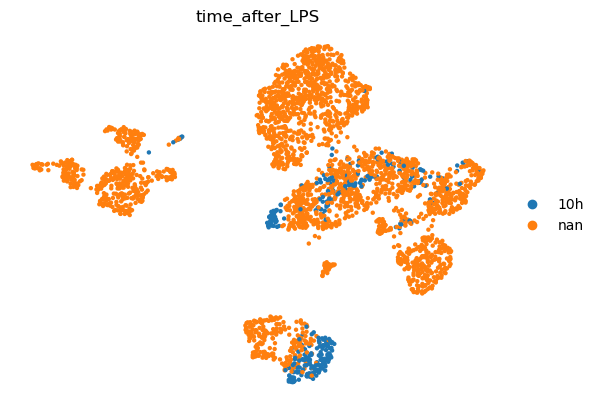

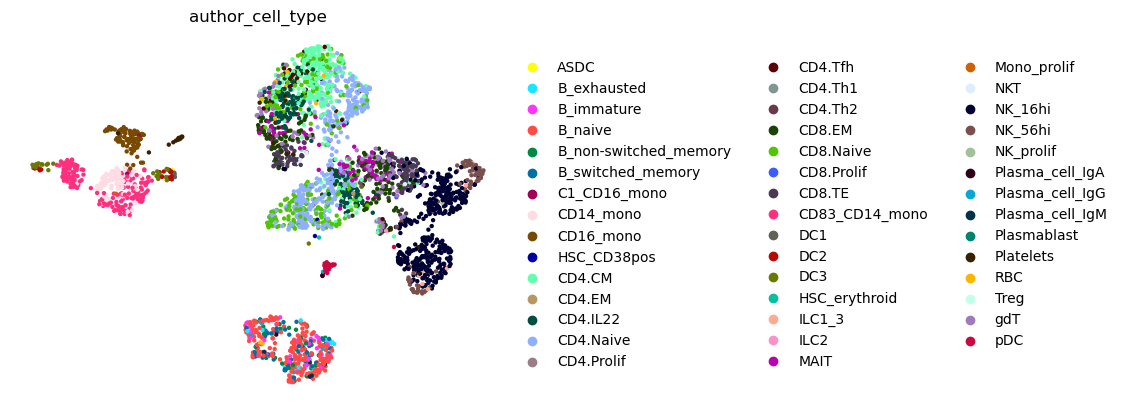

Latent space visualized.



In [15]:
# Visualizing the latent space
analysis.visualize_latent_space(
    plot_cols=['time_after_LPS', 'author_cell_type']
)

In [16]:
# Making predictions for naive B cells at 10h
analysis.make_prediction(
    ctrl_key='nan',
    stim_key='10h',
    celltype_to_predict='B_naive',
    condition_col='time_after_LPS',
    cell_type_col='author_cell_type'
)

Making predictions...


/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
Predictions made.



Evaluating predictions...


/home/giatraskon/BioHackEU24/BioHackathon/tools/Complex_generative/scGen/scGen_class.py:425: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  self.eval_adata = ctrl_adata.concatenate(stim_adata, self.pred)
/home/giatraskon/anaconda3/envs/MLiCB/lib/python3.12/site-packages/anndata/_core/merge.py:1362: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Evaluation data prepared.



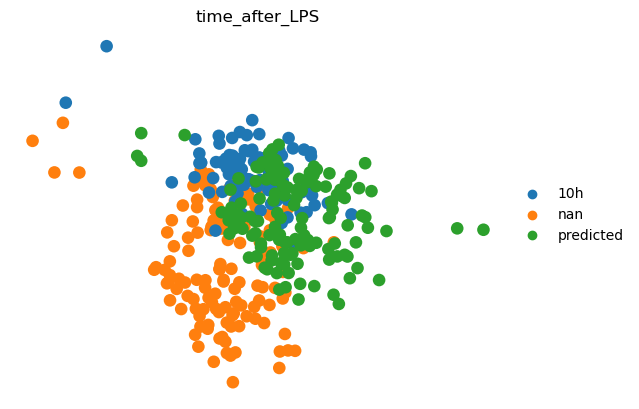

PCA plot created.



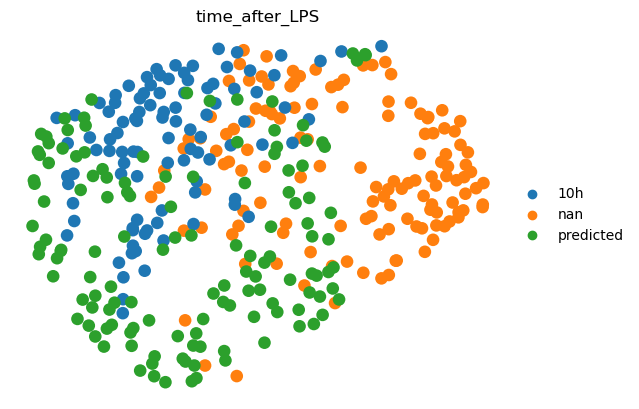

UMAP plot created.



In [17]:
# Evaluating the predictions
analysis.evaluate_prediction(
    condition_col='time_after_LPS',
    cell_type_col='author_cell_type',
    control_condition='nan',
    stimulated_condition='10h',
    celltype_to_evaluate='B_naive',
    pca_components=50
)

Identifying differentially expressed genes...


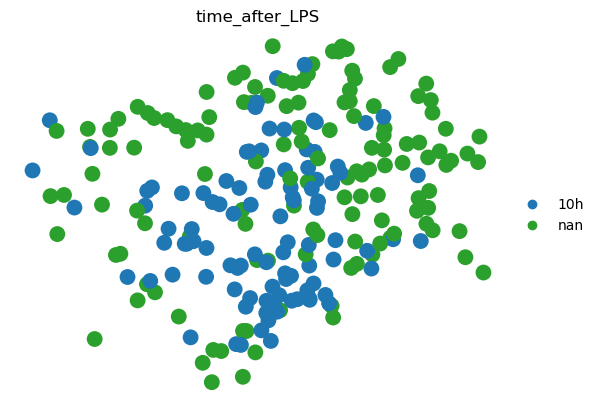

UMAP of 'B_naive' cells plotted.

Differentially expressed genes identified:
['PTPRCAP' 'RPL17' 'ACTB' ... 'TSC22D3' 'JUN' 'DUSP1']



In [18]:
# Identifying differentially expressed genes
analysis.identify_diff_genes(
    cell_type_col='author_cell_type',
    condition_col='time_after_LPS',
    celltype_of_interest='B_naive',
    method='wilcoxon'
)

Plotting mean gene expression correlation...


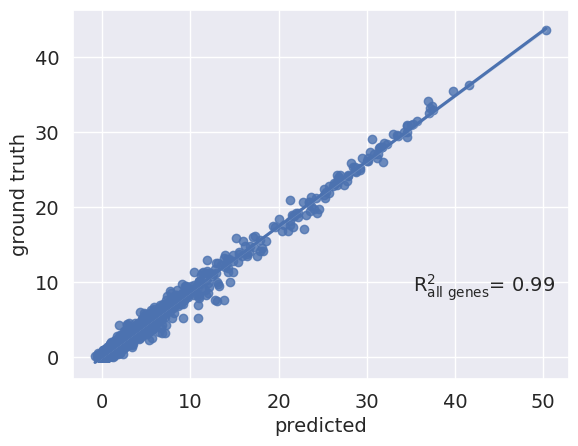

Mean expression correlation (R^2 value): 0.9872594780469396



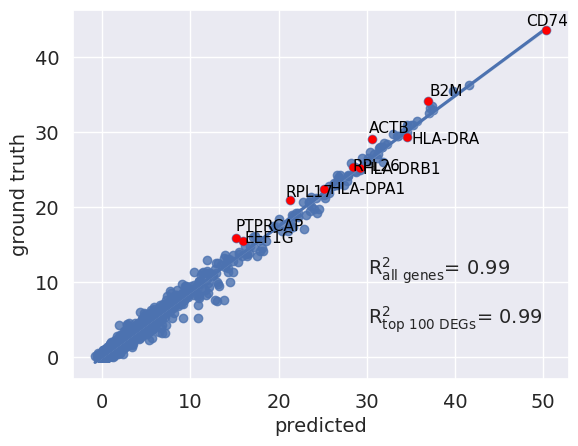

Mean expression correlation for top 10 genes (R^2 value): 0.9872594780469396



In [19]:
# Plotting mean expression correlation
analysis.plot_mean_correlation(
    condition_col='time_after_LPS',
    stimulated_condition='10h',
    x_label='predicted',
    y_label='ground truth',
    top_genes=10
)

In [20]:
# Computing the distance metric
analysis.compute_distance_metric(
    condition_col='time_after_LPS',
    control_condition='nan',
    stimulated_condition='10h',
    pca_components=50,
    metric='edistance'
)

Computing distance metric...
PCA with 50 components computed.

Distance metric 'edistance' initialized.

Perturbation score computed: 0.5753133897656

